# Import library

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [ ]:
df = pd.read_csv('/content/linkdin_Job_data.csv')

In [ ]:
df.head(2)

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
 15  Column1             0 non-null      float64
dtypes: flo

# Missing Value
Pertanyaan : Identifikasi kolom yang memiliki nilai yang hilang dan hitung
persentase data yang hilang di setiap kolom.


In [ ]:
# Menghitung jumlah nilai NaN (kosong) disetiap kolom
df.isna().sum()

,0
job_ID,0
job,33
location,33
company_id,7927
company_name,35
work_type,191
full_time_remote,79
no_of_employ,324
no_of_application,40
posted_day_ago,7


In [ ]:
# Menghitung persentase nilai Nan (Kosong) di tiap kolom
df.isna().sum()/len(df)*100

,0
job_ID,0.000000
job,0.416299
location,0.416299
company_id,100.000000
company_name,0.441529
work_type,2.409487
full_time_remote,0.996594
no_of_employ,4.087297
no_of_application,0.504605
posted_day_ago,0.088306


In [ ]:
# Membuat tabel baru untuk menampilkan nilai missing value dan Persentasenya
df_missing_value = pd.DataFrame({
    'Missing Value' : df.isna().sum(),
    'Percentage' : df.isna().sum()/len(df)*100
})
df_missing_value

,Missing Value,Percentage
job_ID,0,0.000000
job,33,0.416299
location,33,0.416299
company_id,7927,100.000000
company_name,35,0.441529
work_type,191,2.409487
full_time_remote,79,0.996594
no_of_employ,324,4.087297
no_of_application,40,0.504605
posted_day_ago,7,0.088306


* Kolom 'company_id' dan 'column1' memiliki persentase 100% (Tidak ada data) sehingga bisa di drop dari dataset

In [ ]:
# Drop data
df.drop(['company_id', 'Column1'], axis=1, inplace=True)

# Data Type Correction
Pertanyaan: Kolom `no_of_employ` memiliki data numerik yang disimpan
sebagai string. Ubah kolom ini menjad itipe integer dan tangani nilai non-numerik
dengan tepat.
Note : Kamu perlu membuat kolom baru minimal employ dan maksimal employ,
jika datanya tidak berbentuk range maka masuk ke kolom maksimal employ


In [ ]:
# Membersihkan tanda koma dalam data
df['no_of_employ'] = df['no_of_employ'].str.replace(',', '')

In [ ]:
# Membersihkan tanda + setelah angka
df['no_of_employ'] = df['no_of_employ'].str.replace('+', '')

In [ ]:
# Memisahkan angka dengan karakter
df['no_of_employ'] = df['no_of_employ'].str.split('employees')

In [ ]:
# Menghapus karakter
df['no_of_employ'] = df['no_of_employ'].str[0]

In [ ]:
# Mengubah nilai kosong dengan 0
df['no_of_employ'] = df['no_of_employ'].fillna(0)

In [ ]:
df['no_of_employ'].unique()

array(['1001-5000 ', '1-10 ', '10001 ', '51-200 ', '201-500 ', 0,
       '11-50 ', '501-1000 ', '5001-10000 '], dtype=object)

In [ ]:
df['no_of_employ'].head(5)

,no_of_employ
0,1001-5000
1,1001-5000
2,1001-5000
3,1-10
4,1-10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_ID              7927 non-null   int64 
 1   job                 7894 non-null   object
 2   location            7894 non-null   object
 3   company_name        7892 non-null   object
 4   work_type           7736 non-null   object
 5   full_time_remote    7848 non-null   object
 6   no_of_employ        7927 non-null   object
 7   no_of_application   7887 non-null   object
 8   posted_day_ago      7920 non-null   object
 9   alumni              4858 non-null   object
 10  Hiring_person       5720 non-null   object
 11  linkedin_followers  4814 non-null   object
 12  hiring_person_link  5720 non-null   object
 13  job_details         7881 non-null   object
dtypes: int64(1), object(13)
memory usage: 867.1+ KB


In [ ]:
df['no_of_employ'].head(2)

,no_of_employ
0,1001-5000
1,1001-5000


In [ ]:
# Membuat kolom min_employ dan max_employ serta mengisi nilainya dengan ketentuan : data berbentuk range akan dipisahkan dengan "-" untuk pengelompokkan nilai min_employ  dan max_employ nya dan apabila datanya bukan berbentuk range maka akan masuk ke max_employ

df['min_employ'] = df['no_of_employ'].apply(lambda x: '0' if '-' not in str(x) else x.split('-')[0].strip())
df['max_employ'] = df['no_of_employ'].apply(lambda x: x if '-' not in str(x) else x.split('-')[-1].strip())

In [ ]:
df['min_employ'].unique()

array(['1001', '1', '0', '51', '201', '11', '501', '5001'], dtype=object)

In [ ]:
df['max_employ'].unique()

array(['5000', '10', '10001 ', '200', '500', 0, '50', '1000', '10000'],
      dtype=object)

In [ ]:
# Mengubah tipe datanya ke numerik
df['min_employ'] = pd.to_numeric(df['min_employ'])
df['max_employ'] = pd.to_numeric(df['max_employ'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_ID              7927 non-null   int64 
 1   job                 7894 non-null   object
 2   location            7894 non-null   object
 3   company_name        7892 non-null   object
 4   work_type           7736 non-null   object
 5   full_time_remote    7848 non-null   object
 6   no_of_employ        7927 non-null   object
 7   no_of_application   7887 non-null   object
 8   posted_day_ago      7920 non-null   object
 9   alumni              4858 non-null   object
 10  Hiring_person       5720 non-null   object
 11  linkedin_followers  4814 non-null   object
 12  hiring_person_link  5720 non-null   object
 13  job_details         7881 non-null   object
 14  min_employ          7927 non-null   int64 
 15  max_employ          7927 non-null   int64 
dtypes: int64(3), object(13)


# Duplicate Data Detection and Removal
Pertanyaan: Deteksi dan hapus posting pekerjaan yang duplikat berdasarkan
`job_ID` Pastikan dataset yang dihasilkan hanya berisi posting pekerjaan yang
unik.


In [ ]:
# Menghitung jumlah data duplicate berdasarkan job_id
df.duplicated(subset='job_ID').sum()

2084

In [ ]:
# Menghapus duplicate data dengan perintah drop_duplicates
df.drop_duplicates(subset='job_ID', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5843 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_ID              5843 non-null   int64 
 1   job                 5816 non-null   object
 2   location            5816 non-null   object
 3   company_name        5815 non-null   object
 4   work_type           5711 non-null   object
 5   full_time_remote    5776 non-null   object
 6   no_of_employ        5843 non-null   object
 7   no_of_application   5810 non-null   object
 8   posted_day_ago      5837 non-null   object
 9   alumni              3586 non-null   object
 10  Hiring_person       4157 non-null   object
 11  linkedin_followers  3530 non-null   object
 12  hiring_person_link  4157 non-null   object
 13  job_details         5805 non-null   object
 14  min_employ          5843 non-null   int64 
 15  max_employ          5843 non-null   int64 
dtypes: int64(3), object(13)
memor

# Standarisasi Data
Pertanyaan: Standarisasi kolom `location` dengan memastikan semua nama kota
ditulis dengan huruf besar dan konsisten (misalnya,"New York","San Francisco").


In [ ]:
# Cek jumlah nama kota yang diawali huruf kapital
df['location'].str.istitle().sum()

5792

In [ ]:
# Menampilkan kolom yang tidak sesuai dengan syarat
df[df['location'].str.istitle()==False]

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,min_employ,max_employ
4,3473311511,Data Analyst,"Mohali district, Punjab, India",Timeline Freight Brokers,On-site,Full-time,1-10,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,1,10
212,3472830898,Mern stack developer,"Mohali district, Punjab, India",Opportunity One Step Solutions Private Limited,On-site,Full-time,51-200,11,5 hours,NaN,Apurva Tiwari,"10,712 followers",https://www.linkedin.com/in/apurva-tiwari-6a14...,About the job REACTJS AND NODEJSEXPERIENCE- 2YRS+,51,200
913,3472837170,IIB Developer,"Bangalore Urban district, India",The IT Mind,On-site,Full-time,11-50,11,9 hours,NaN,Shrutika Khare,NaN,https://www.linkedin.com/in/shrutika-khare-069...,About the job Role** IIB and IBM MQ Support As...,11,50
1092,3471876627,Python Web scraping | Crawling - Id: 7ec3,"Mohali district, Punjab, India",Gmware,On-site,Full-time,51-200,19,17 hours,NaN,Prerna Mittal,"28,101 followers",https://www.linkedin.com/in/prerna-mittal-040a...,About the job Roles and Responsibilities:Knowl...,51,200
1165,3467373716,Game Developer,APAC,Hyqoo,Remote,Contract · Associate,11-50,hours,13 hours,1 company alumni,Nida Noor,"67,526 followers",https://www.linkedin.com/in/nidanoor12,About the job Title – Real-Time Game Developer...,11,50
1606,3473365792,CI/Laravel Developer,"Kolkata metropolitan area, West Bengal, India",Aranax Technologies Pvt Ltd,On-site,Full-time,1-10,hours,4 hours,NaN,Kousik Pan,108 followers,https://www.linkedin.com/in/kousik-pan-395a21116,About the job Job Description: We are seeking ...,1,10
1678,3472537497,NodeJs Developer,"Mohali district, Punjab, India",Henceforth Solutions,On-site,Full-time,51-200,hours,16 hours,NaN,Simran Walia,NaN,https://www.linkedin.com/in/simran-walia-244b4...,About the job Should have minimum experience o...,51,200
2136,3469578662,Golang developer,"Mohali district, Punjab, India",Plum Careers,NaN,Full-time,1-10,2,1 day,NaN,Aakriti G,94 followers,https://www.linkedin.com/in/aakriti-g-746872205,About the job Roles & Responsibilities• Implem...,1,10
2157,3458548152,Data Visualization,"Bangalore Urban district, India",Tata Consultancy Services,Hybrid,Full-time · Mid-Senior level,10001,200,6 days,"10,080 company alumni",NaN,"11,920,290 followers",NaN,About the job Visualization tools and software...,0,10001
2419,3466109642,Full Stack Developer,"Kolkata metropolitan area, West Bengal, India",SkillTechLab Pvt Ltd,On-site,Full-time,51-200,day,1 day,NaN,skill tech lab,143 followers,https://www.linkedin.com/in/skill-tech-lab-a94...,About the job Job Overview The Full Stack Deve...,51,200


In [ ]:
# Mengubah data menjadi capital each word
df['location'] = df['location'].str.title()

In [ ]:
df['location'].str.istitle().sum()

5816

In [ ]:
df['location'][1606]

'Kolkata Metropolitan Area, West Bengal, India'

In [ ]:
df['location'][2157]

'Bangalore Urban District, India'

In [ ]:
df['location'][6272]

'Apac'

# Deteksi dan Analisis Outlier
Pertanyaan: Identifikasi outlier pada kolom `no_of_application`. Definisikan
outlier menggunakan metode IQR (Interquartile Range) dan berikan analisis
singkat tentang temuan tersebut.

In [ ]:
df['no_of_application'].head(5)

,no_of_application
0,200
1,184
2,200
3,200
4,8


In [ ]:
# Cek missing value
df['no_of_application'].isna().sum()

33

In [ ]:
df['no_of_application'].describe()

,no_of_application
count,5810
unique,198
top,hours
freq,2005


In [ ]:
# Menampilkan data yang bukan angka
df[df['no_of_application'].str.isnumeric()==False]

,job_ID,job,location,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,min_employ,max_employ
9,3473336242,Shopify Developer,"Gurugram, Haryana, India",ADesignGuy,Hybrid,NaN,0,minutes,9 minutes,NaN,NaN,"2,163 followers",NaN,About the job Job Title: Shopify Developer (In...,0,0
23,3471878927,Spotfire Developer,"Bengaluru, Karnataka, India",Experis India,On-site,Full-time,1001-5000,hours,10 hours,3 company alumni,Shivani MB,"29,076 followers",https://www.linkedin.com/in/shivani-mb-806788145,About the job Responsibilities Role : Spotfire...,1001,5000
30,3472851497,ssrs,"Mumbai, Maharashtra, India",GenXHire Services Private Limited,On-site,Full-time,51-200,hours,4 hours,NaN,Suraj Nayak,NaN,https://www.linkedin.com/in/suraj-nayak-b79b8124b,About the job Responsibilities:• Individual co...,51,200
44,3467835536,TIBCO BW5 Development,India,SRIK Consulting Services Pvt Ltd,Remote,Full-time,11-50,minutes,37 minutes,1 company alumni,SRIK Consulting Services Pvt Ltd,"1,172 followers",https://www.linkedin.com/in/srik-consulting,About the job Position / Designation: Tibco BW...,11,50
49,3474814865,Sr. PHP/Laravel Developer,"Kochi, Kerala, India",Chris Johnson Business IT Solutions,NaN,Full-time,51-200,hours,4 hours,NaN,Chris Johnson,42 followers,https://www.linkedin.com/in/chris-johnson-0257...,About the job Job descriptionChris Johnson Bus...,51,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3464527383,Sap Finance Control Consultant,"Chennai, Tamil Nadu, India",Tata Consultancy Services,On-site,Full-time · Associate,10001,days,3 days,"10,080 company alumni",Linu James,"11,923,043 followers",https://www.linkedin.com/in/linu-james-731a6b149,About the job Greetings from TCS !!! TATA CONS...,0,10001
7557,3459365095,Inside Sales Executive | Digital Refresh Networks,"Mumbai, Maharashtra, India",Digital Refresh Networks,On-site,Full-time · Executive,51-200,days,6 days,NaN,Aamir H,"7,910 followers",https://www.linkedin.com/in/aamir-h-81355b1b4,About the job Company Profile:We (https://www....,51,200
7558,3459759470,Digital Marketing Executive/Manager,"Hyderabad, Telangana, India",KOVIDA LIMITED,On-site,Full-time,51-200,days,5 days,NaN,eksaq lms,"1,603 followers",https://www.linkedin.com/in/eksaq-lms-95a1131b7,About the job Digital marketing executive/Mana...,51,200
7560,3468727380,Technical Lead,"Pune, Maharashtra, India",Atos,Hybrid,Full-time · Mid-Senior level,10001,days,2 days,"2,241 company alumni",Sonali Borkar,NaN,https://www.linkedin.com/in/sonali-borkar-2049...,About the job ATOS is Hiring Immediate Joiners...,0,10001


In [ ]:
# Menghitung jumlah data yang bukan angka
df[df['no_of_application'].str.isnumeric()==False].shape[0]

3278

In [ ]:
df['no_of_application'].unique()

array(['200', '184', '8', '2', '7', 'minutes', '22', '111', '36', '44',
       '29', '4', '19', '14', '13', '32', '20', 'hours', '5', '21', '27',
       '85', '97', '42', '3', '1', '130', '127', '11', '16', '60', '17',
       '52', '50', '10', '61', '95', '39', '18', '6', '40', '138', '9',
       '26', '78', '47', '104', '15', '110', '25', '38', '122', '34',
       '149', '83', '57', '66', '56', '80', '135', '158', '139', '54',
       '28', '23', '12', '175', '35', '87', '109', '71', '70', '24', '96',
       '48', '103', '31', 'days', '68', '147', 'day', '65', nan, '59',
       '102', '53', '125', '143', '142', '150', '195', '160', '99', '112',
       '67', '74', '134', '43', '98', '146', '55', '115', '108', '176',
       '113', '30', '76', '72', '129', '100', '172', 'hour', '51',
       'seconds', '79', '69', '46', '132', '114', '136', '117', '106',
       '173', '73', '174', '145', '84', '190', '77', '81', '33', '166',
       '164', '163', '94', '128', '161', '194', '152', '159', '13

In [ ]:
# Mengubah data ke numerik dengan mengabaikan nilai selain numerik
df['no_of_application'] = pd.to_numeric(df['no_of_application'], errors='coerce')

In [ ]:
df['no_of_application'].unique()

array([200., 184.,   8.,   2.,   7.,  nan,  22., 111.,  36.,  44.,  29.,
         4.,  19.,  14.,  13.,  32.,  20.,   5.,  21.,  27.,  85.,  97.,
        42.,   3.,   1., 130., 127.,  11.,  16.,  60.,  17.,  52.,  50.,
        10.,  61.,  95.,  39.,  18.,   6.,  40., 138.,   9.,  26.,  78.,
        47., 104.,  15., 110.,  25.,  38., 122.,  34., 149.,  83.,  57.,
        66.,  56.,  80., 135., 158., 139.,  54.,  28.,  23.,  12., 175.,
        35.,  87., 109.,  71.,  70.,  24.,  96.,  48., 103.,  31.,  68.,
       147.,  65.,  59., 102.,  53., 125., 143., 142., 150., 195., 160.,
        99., 112.,  67.,  74., 134.,  43.,  98., 146.,  55., 115., 108.,
       176., 113.,  30.,  76.,  72., 129., 100., 172.,  51.,  79.,  69.,
        46., 132., 114., 136., 117., 106., 173.,  73., 174., 145.,  84.,
       190.,  77.,  81.,  33., 166., 164., 163.,  94., 128., 161., 194.,
       152., 159., 137.,  88., 162., 177., 105.,  41.,  49., 133., 187.,
        82., 123., 193.,  91., 148.,  45., 141.,  5

## Pendekatan dengan melakukan drop nilai nan

In [ ]:
# Drop nan
df_drop_nan = df.dropna(subset=['no_of_application'])
df_drop_nan['no_of_application'].unique()

array([200., 184.,   8.,   2.,   7.,  22., 111.,  36.,  44.,  29.,   4.,
        19.,  14.,  13.,  32.,  20.,   5.,  21.,  27.,  85.,  97.,  42.,
         3.,   1., 130., 127.,  11.,  16.,  60.,  17.,  52.,  50.,  10.,
        61.,  95.,  39.,  18.,   6.,  40., 138.,   9.,  26.,  78.,  47.,
       104.,  15., 110.,  25.,  38., 122.,  34., 149.,  83.,  57.,  66.,
        56.,  80., 135., 158., 139.,  54.,  28.,  23.,  12., 175.,  35.,
        87., 109.,  71.,  70.,  24.,  96.,  48., 103.,  31.,  68., 147.,
        65.,  59., 102.,  53., 125., 143., 142., 150., 195., 160.,  99.,
       112.,  67.,  74., 134.,  43.,  98., 146.,  55., 115., 108., 176.,
       113.,  30.,  76.,  72., 129., 100., 172.,  51.,  79.,  69.,  46.,
       132., 114., 136., 117., 106., 173.,  73., 174., 145.,  84., 190.,
        77.,  81.,  33., 166., 164., 163.,  94., 128., 161., 194., 152.,
       159., 137.,  88., 162., 177., 105.,  41.,  49., 133., 187.,  82.,
       123., 193.,  91., 148.,  45., 141.,  58.,  6

<Axes: xlabel='no_of_application', ylabel='Count'>

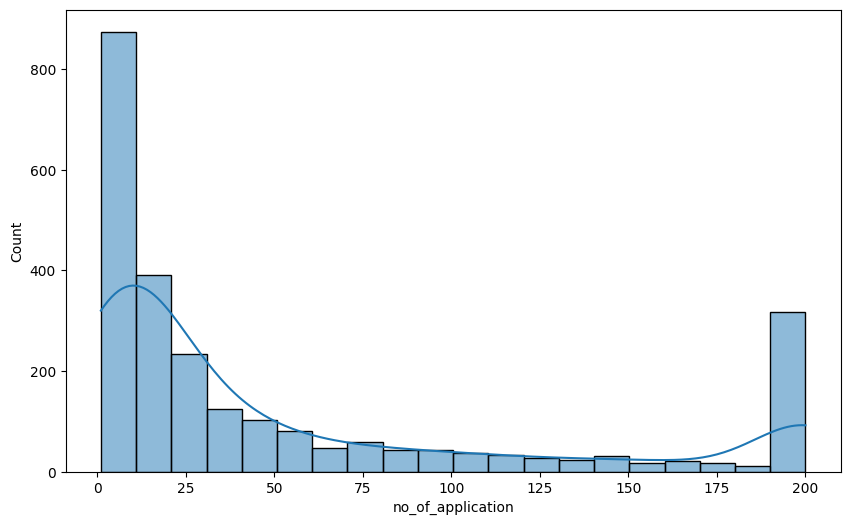

In [ ]:
# Visualisasi dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_drop_nan['no_of_application'], bins=20, kde=True)

- Dari histogram diatas, kita bisa melihat bahwa data berpusat pada nilai yang rendah yaitu 0-25 dan juga bisa dilihat bahwa histogram ini menunjukan ditribusi data Skewness positif

<Axes: xlabel='no_of_application'>

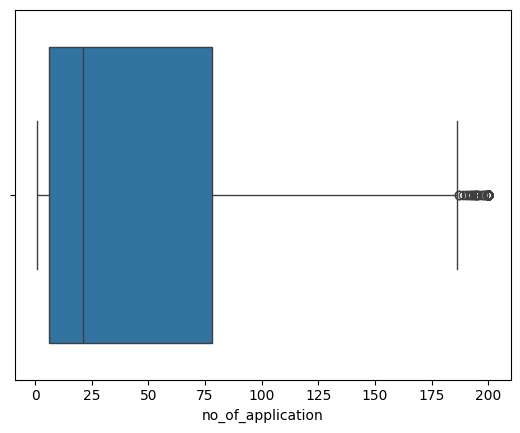

In [ ]:
sns.boxplot(
    data=df_drop_nan,
    x="no_of_application"
)

- Dari boxplot di atas, terlihat beberapa outlier yang jelas di ujung kanan, yang menunjukkan nilai yang sangat tinggi.

In [ ]:
df_drop_nan['no_of_application'].describe()

,no_of_application
count,2532.000000
mean,54.292259
std,67.620527
min,1.000000
25%,6.000000
50%,21.000000
75%,78.000000
max,200.000000


<Axes: xlabel='no_of_application'>

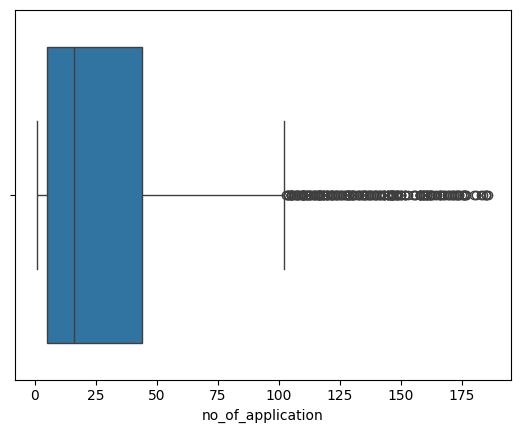

In [ ]:
# Menggunakan metode IQR
Q1 = df_drop_nan['no_of_application'].quantile(0.25)
Q3 = df_drop_nan['no_of_application'].quantile(0.75)
IQR = Q3 - Q1

# Mencari nilai outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Menentukan kondisi
condition = (df_drop_nan['no_of_application'] >= lower_bound) & (df_drop_nan['no_of_application'] <= upper_bound)

df_drop_nan = df_drop_nan[condition]

#  menampilkan data oulier
sns.boxplot(
    data=df_drop_nan,
    x="no_of_application"
)

- Boxplot setelah penanganan outlier menunjukkan bahwa tidak ada lagi outlier yang terdeteksi. Whiskers (garis batas atas dan bawah pada boxplot) sekarang berada dalam rentang yang lebih normal, dan distribusi terlihat lebih konsisten.

<Axes: xlabel='no_of_application', ylabel='Count'>

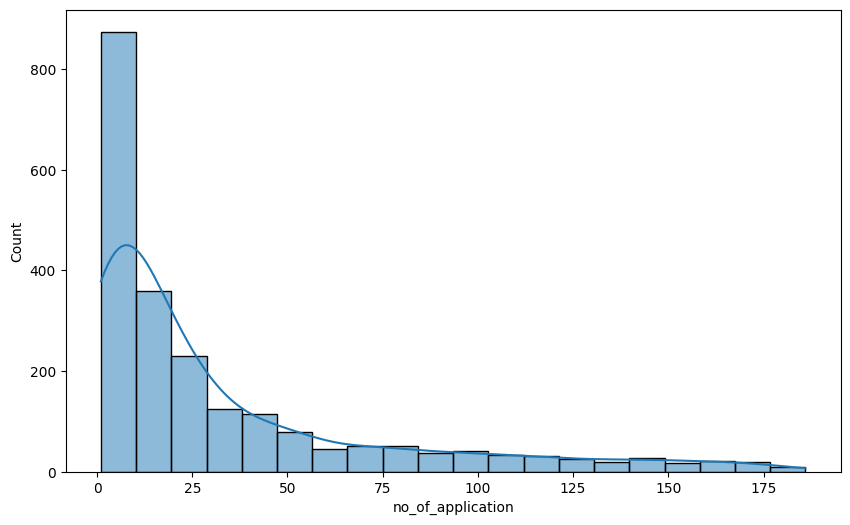

In [ ]:
# Visualisasi dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_drop_nan['no_of_application'], bins=20, kde=True)

- Setelah outliernya dihapus menggunakan metode IQR, hasil histogramnya menjadi lebih seimbang. Kemudian distribusi datanya yang sekarang lebih terpusat di sekitar nilai yang lebih rendah, dan skewness berkurang karena outlier di bagian kanan telah dihilangkan sehingga distrbusi datanya lebih seimbang.

## Pendekatan dengan mengisi nilai nan dengan median

In [ ]:
df_median = df.copy()
df_median['no_of_application'].unique()

array([200., 184.,   8.,   2.,   7.,  nan,  22., 111.,  36.,  44.,  29.,
         4.,  19.,  14.,  13.,  32.,  20.,   5.,  21.,  27.,  85.,  97.,
        42.,   3.,   1., 130., 127.,  11.,  16.,  60.,  17.,  52.,  50.,
        10.,  61.,  95.,  39.,  18.,   6.,  40., 138.,   9.,  26.,  78.,
        47., 104.,  15., 110.,  25.,  38., 122.,  34., 149.,  83.,  57.,
        66.,  56.,  80., 135., 158., 139.,  54.,  28.,  23.,  12., 175.,
        35.,  87., 109.,  71.,  70.,  24.,  96.,  48., 103.,  31.,  68.,
       147.,  65.,  59., 102.,  53., 125., 143., 142., 150., 195., 160.,
        99., 112.,  67.,  74., 134.,  43.,  98., 146.,  55., 115., 108.,
       176., 113.,  30.,  76.,  72., 129., 100., 172.,  51.,  79.,  69.,
        46., 132., 114., 136., 117., 106., 173.,  73., 174., 145.,  84.,
       190.,  77.,  81.,  33., 166., 164., 163.,  94., 128., 161., 194.,
       152., 159., 137.,  88., 162., 177., 105.,  41.,  49., 133., 187.,
        82., 123., 193.,  91., 148.,  45., 141.,  5

In [ ]:
# Mengisi nilai nan dengan median
df_median['no_of_application'] = df_median['no_of_application'].fillna(df_median['no_of_application'].median())

In [ ]:
# Cek nilai nan
df_median['no_of_application'].isna().sum()

0

In [ ]:
df_median['no_of_application'].describe()

,no_of_application
count,5843.000000
mean,35.426836
std,47.468196
min,1.000000
25%,21.000000
50%,21.000000
75%,21.000000
max,200.000000


<Axes: xlabel='no_of_application', ylabel='Count'>

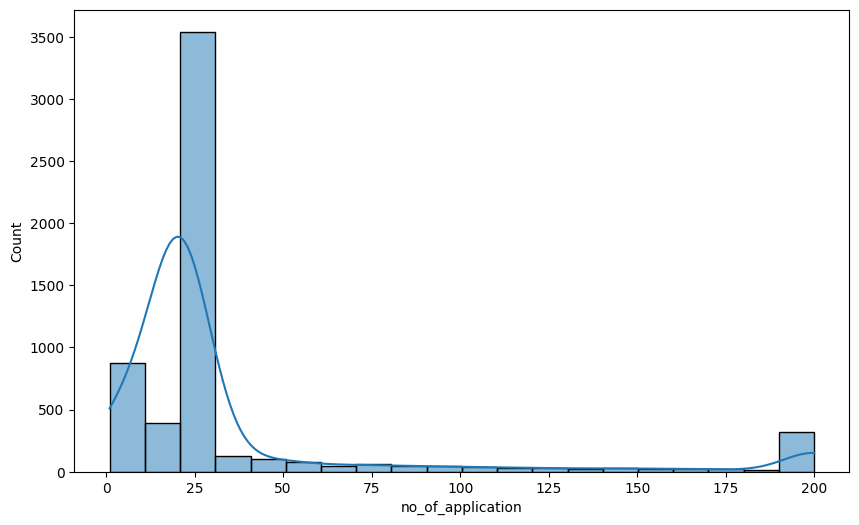

In [ ]:
# Visualisasi dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_median['no_of_application'], bins=20, kde=True)

- Dari histogram diatas, kita bisa melihat bahwa data berpusat pada nilai  median nya yaitu sekitar nilai 25
- Untuk adanya skewness positif tidak terlalu banyak seperti pada data dengan drop nan

<Axes: xlabel='no_of_application'>

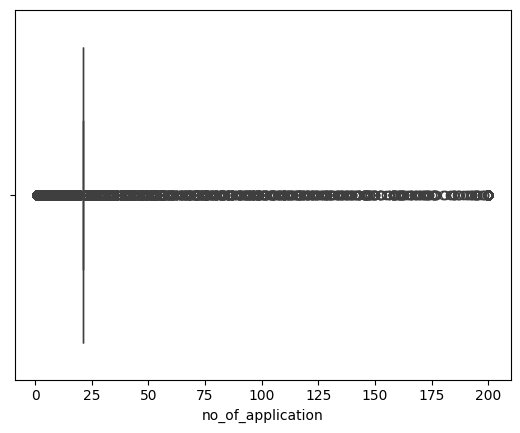

In [ ]:
sns.boxplot(
    data=df_median,
    x="no_of_application"
)

- Untuk boxplotnya terlihat lebih seimbang dibandingkan dengan boxplot dengan pendekatan pengahpusan nilai nan

<Axes: xlabel='no_of_application'>

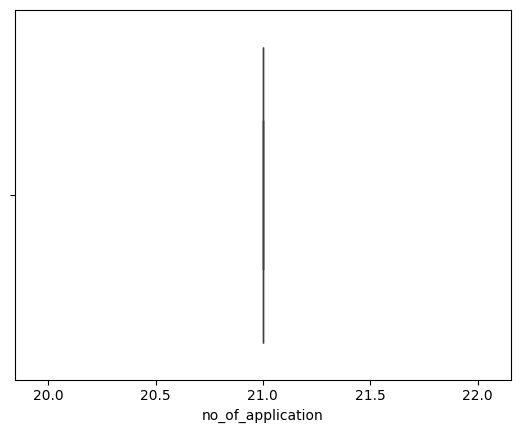

In [ ]:
# Menggunakan metode IQR
Q1 = df_median['no_of_application'].quantile(0.25)
Q3 = df_median['no_of_application'].quantile(0.75)
IQR = Q3 - Q1

# Mencari nilai outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Menentukan kondisi
condition = (df_median['no_of_application'] >= lower_bound) & (df_median['no_of_application'] <= upper_bound)

df_median = df_median[condition]

#  menampilkan data oulier
sns.boxplot(
    data=df_median,
    x="no_of_application"
)

- Setelah outlier dihapus, boxplot tidak lagi menunjukkan outlier

<Axes: xlabel='no_of_application', ylabel='Count'>

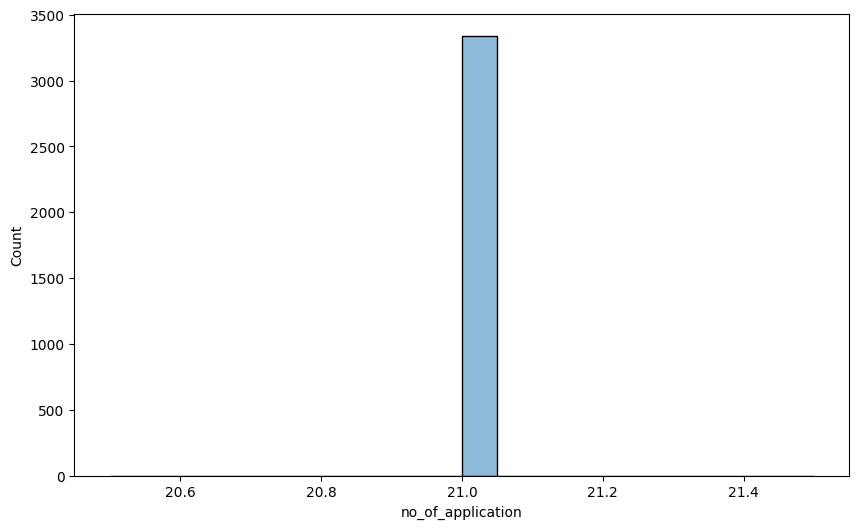

In [ ]:
# Visualisasi dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_median['no_of_application'], bins=20, kde=True)

- Setelah penanganan outlier distribusinya menjadi terpusat

## Analisa :
Perbandingan histogram antara pendekatan drop nan dengan imputasi nilai median
- Drop nan : Sebelum penanganan outliers distribusi datanya menunjukkan adanya skewness lalu setelah penanganan dengan IQR skewness berkurang signifikan
- Imputasi median : Sebelum penanganan outliers distribusi datanya tampak lebih stabil dari pendekatan drop nan serta skewness tidak terlalu banyak lalu setelah penanganan dengan IQR distribusi datanya menjadi terpusat dan merata

Perbandingan boxplot antara pendekatan drop nan dengan imputasi nilai median
- Drop nan : Terlihat banyak outliers sebelum dilakukan penanganan kemudian setelah penanganan dengan IQR boxplot tidak lagi menunjukkan adanya outliers
- Imputasi median : Terlihat lebih smooth dari boxplot dropnan kemudian setelah penanganan dengan IQR juga tidak menunjukkan adanya outliers